In [1]:
from dganguli import *

# Generate low rank synthetic data:
N = 100
num_groups = 3
num_values_per_group = 40
p_missing = 0.2

Ds = []
for k in range(num_groups):
    d = np.ones((N, num_values_per_group)) * (k + 1) * 10
    Ds.append(d)

D = np.hstack(Ds) # Dimensions of D: 100x120
                  # 10s: (100, 40), 20s: (100, 40), 30s: (100, 40)

# Considers some data missing and scraps it:
n1, n2 = D.shape
S = np.random.rand(n1, n2)
D[S < p_missing] = 0

# Use R_pca to estimate the degraded data as L + S,
# where L is low rank, and S is sparse:
rpca = R_pca(D)
L, S = rpca.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 5.085150037347981
iteration: 100, error: 0.12114490181286694
iteration: 200, error: 0.030072694038373943
iteration: 300, error: 0.018081869172318635
iteration: 400, error: 0.01683259967619812
iteration: 500, error: 0.02106729763645527
iteration: 600, error: 0.04276821943667872
iteration: 700, error: 0.06755545156866753
iteration: 800, error: 0.0043942656451477075
iteration: 900, error: 0.00021856575654379364
iteration: 902, error: 9.230434543087661e-05


In [2]:
# To find out the missing data:

D2 = D.copy()

D2.resize((D2.size)) # D2.shape --> (12000,)

from collections import Counter

dict(Counter(D2.tolist()))[0.0]

2363

ymin: 0.0, ymax: 30.0


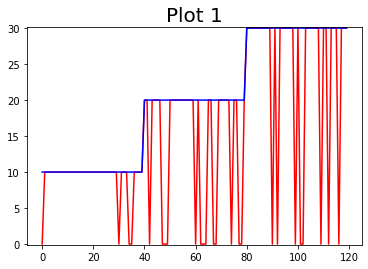

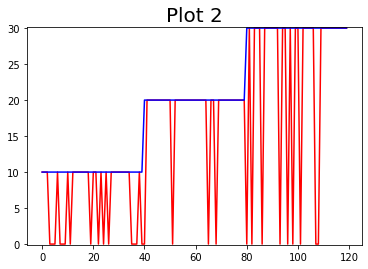

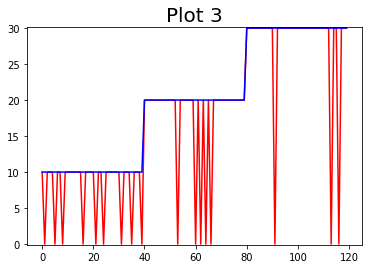

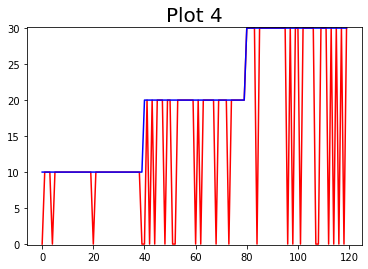

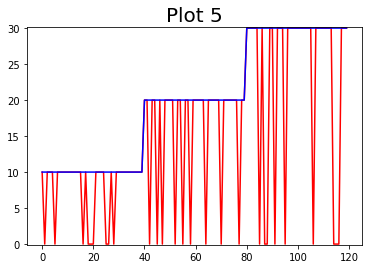

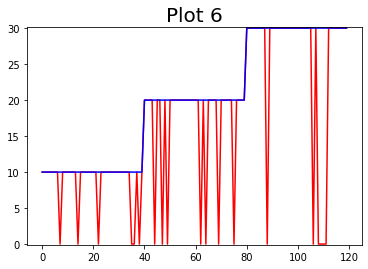

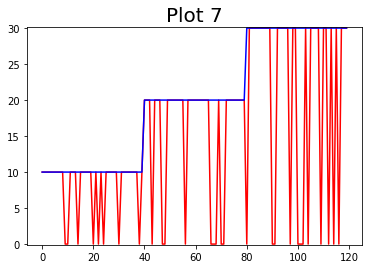

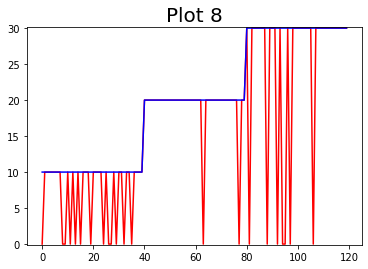

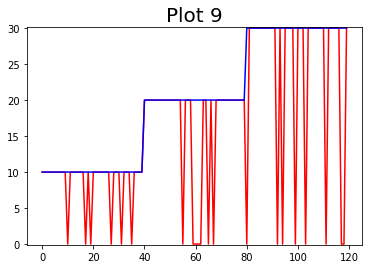

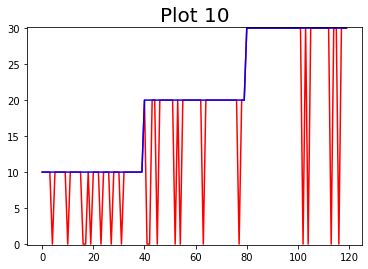

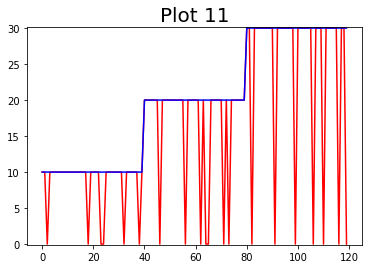

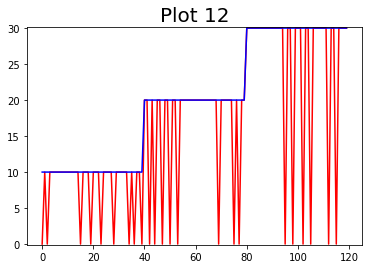

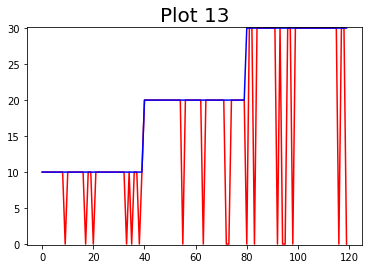

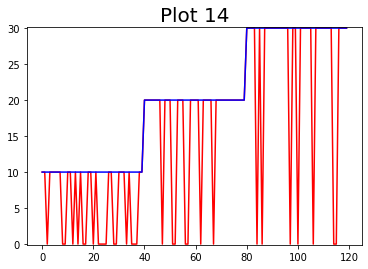

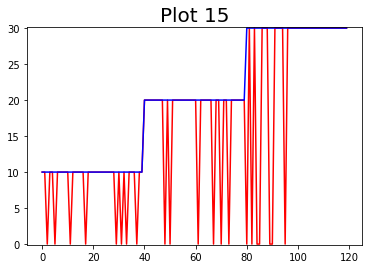

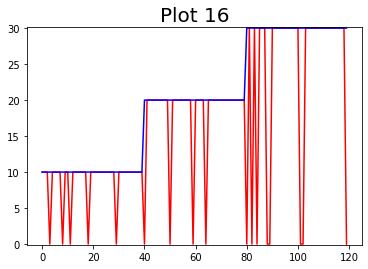

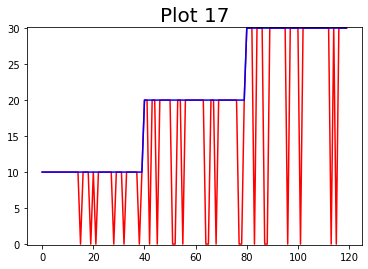

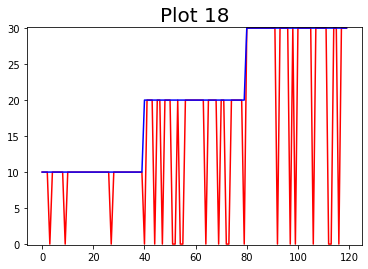

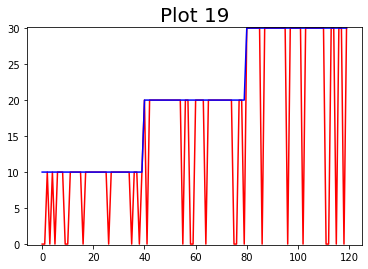

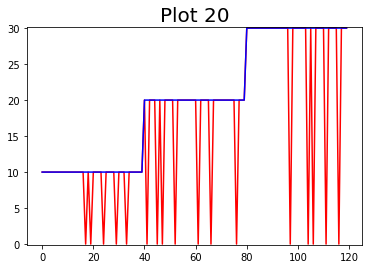

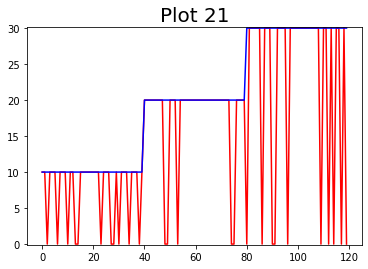

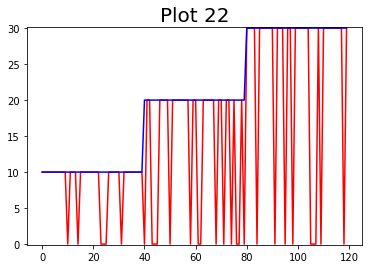

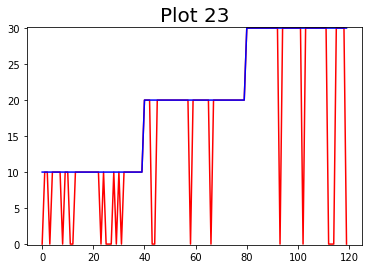

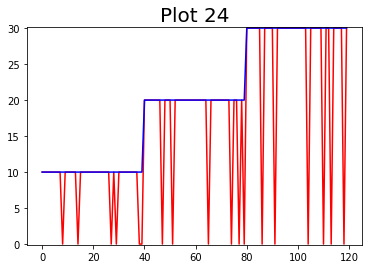

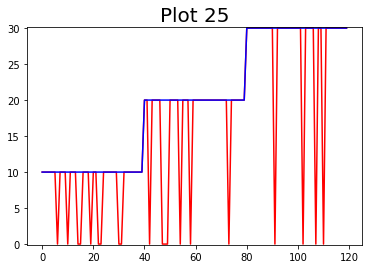

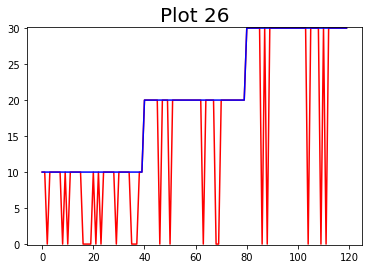

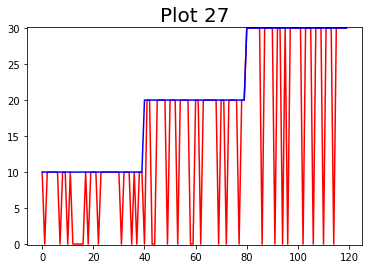

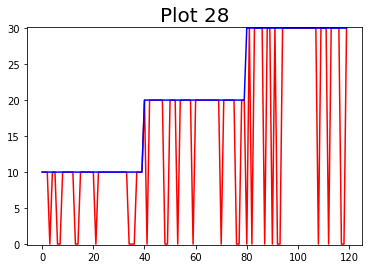

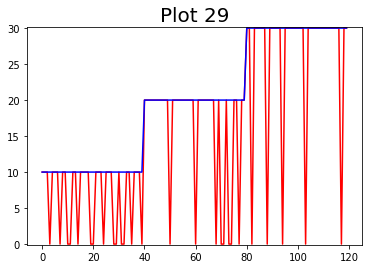

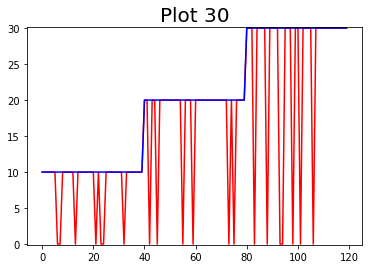

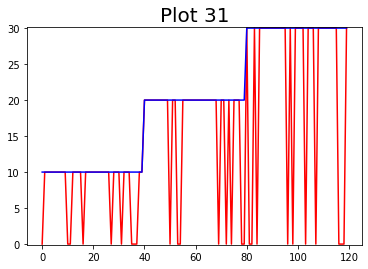

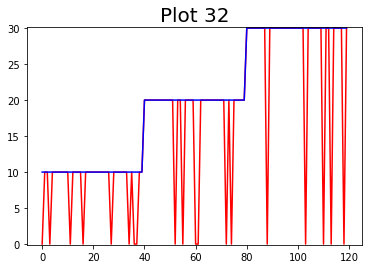

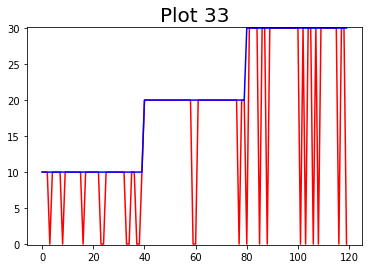

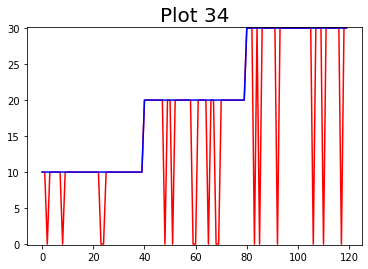

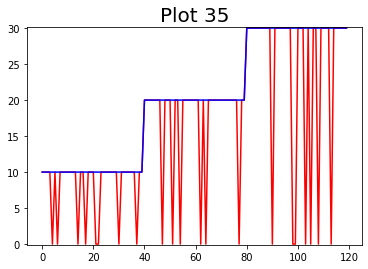

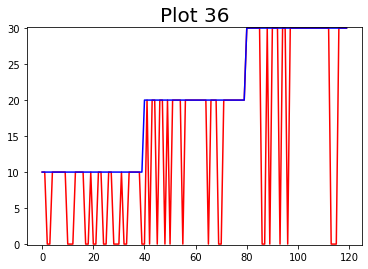

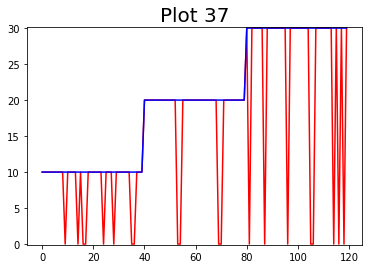

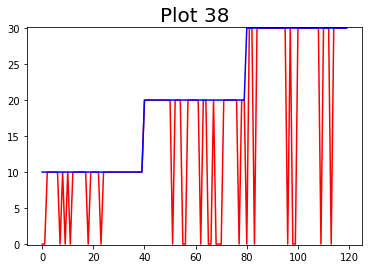

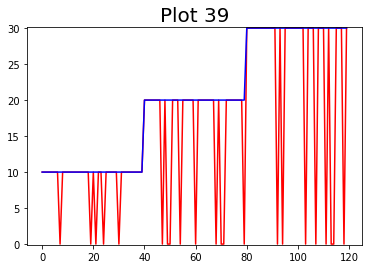

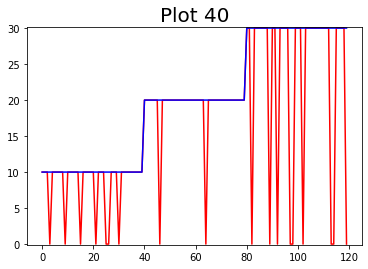

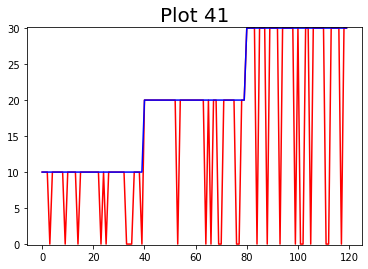

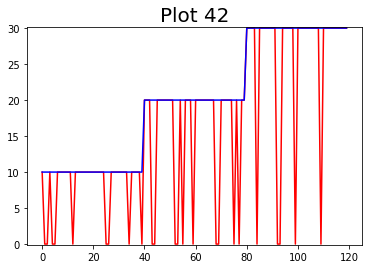

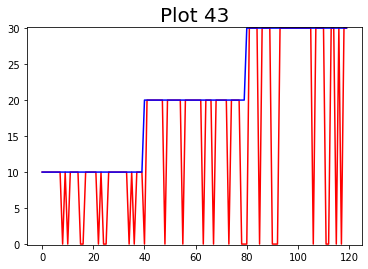

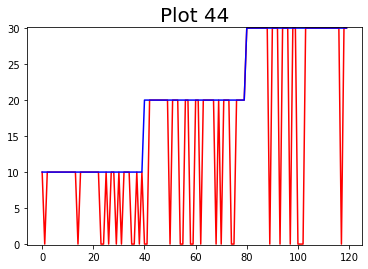

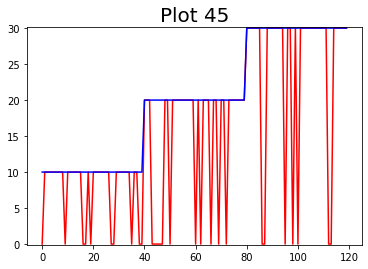

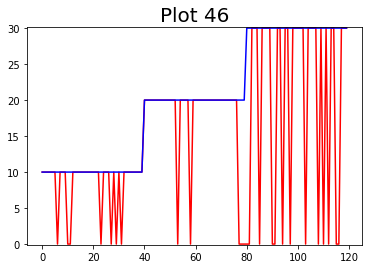

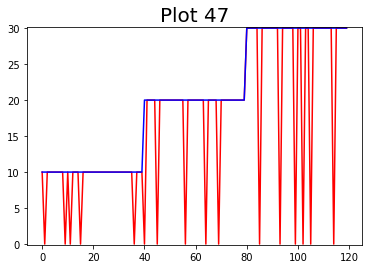

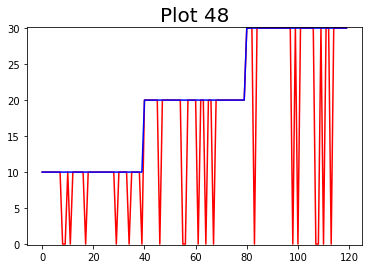

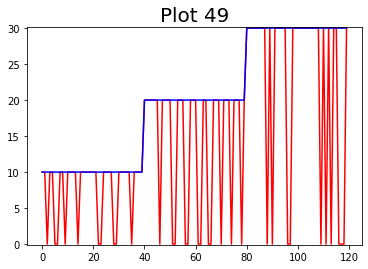

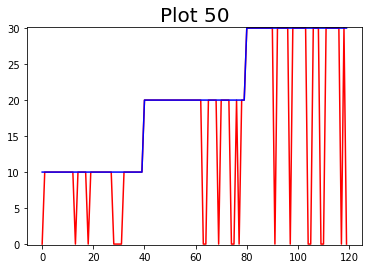

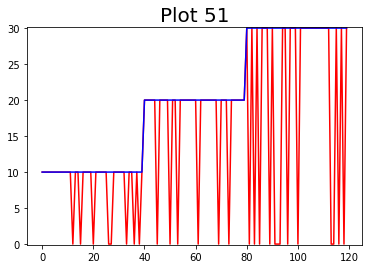

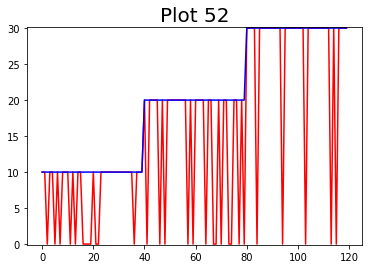

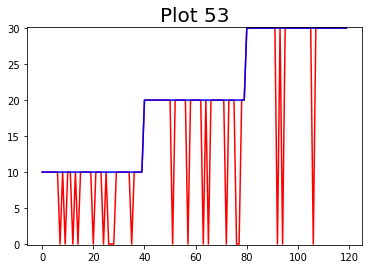

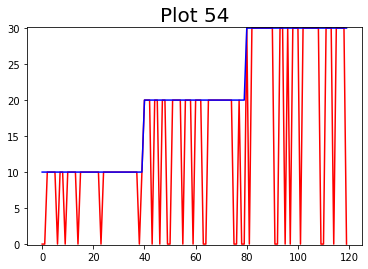

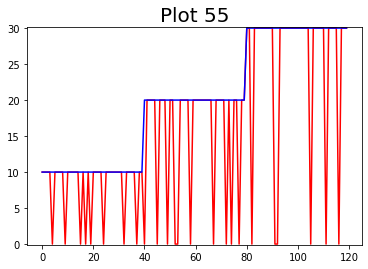

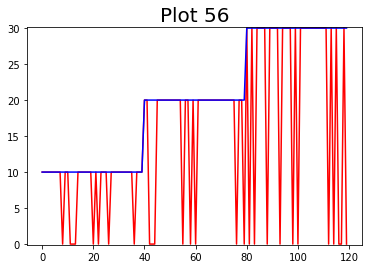

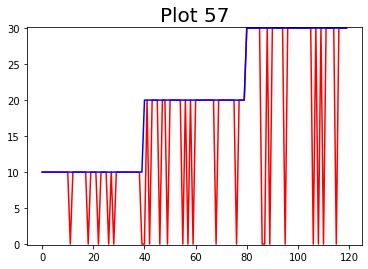

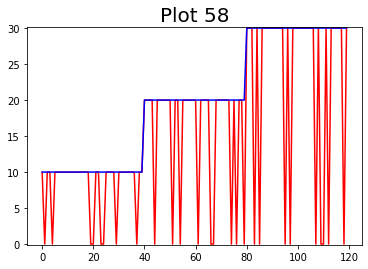

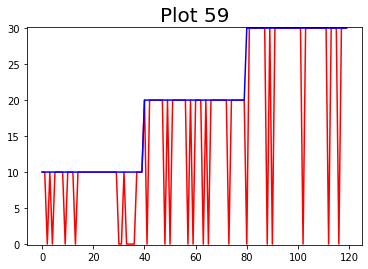

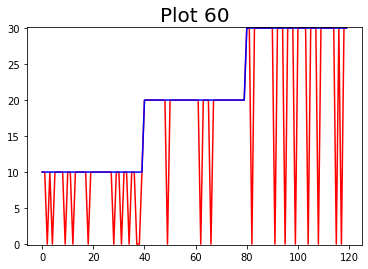

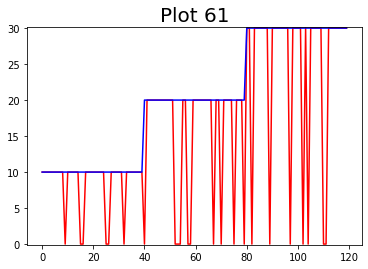

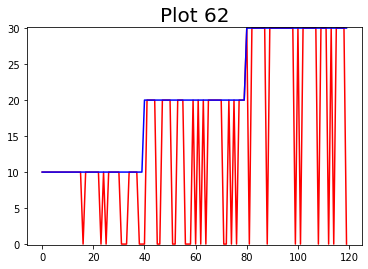

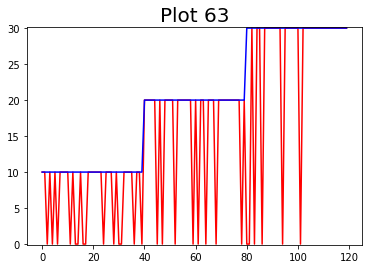

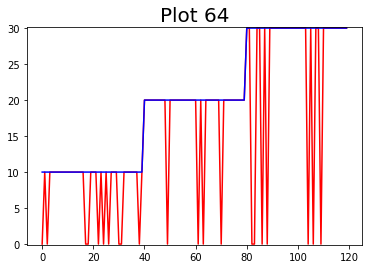

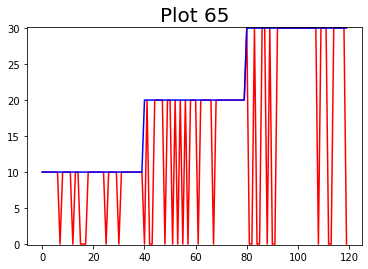

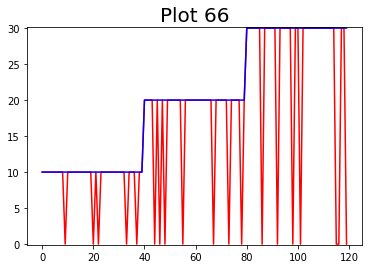

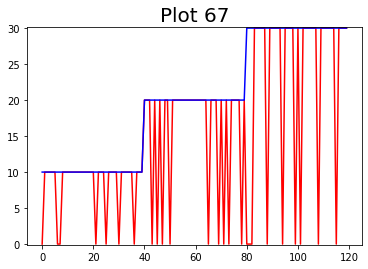

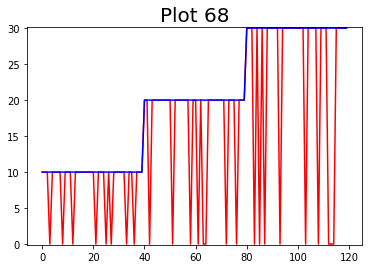

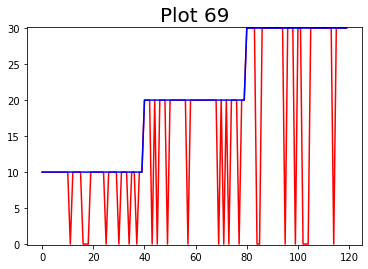

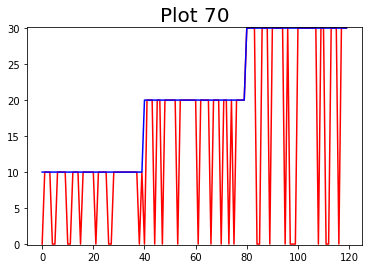

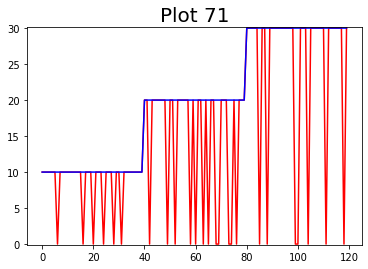

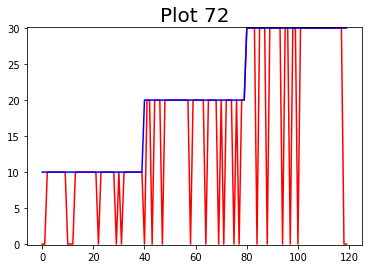

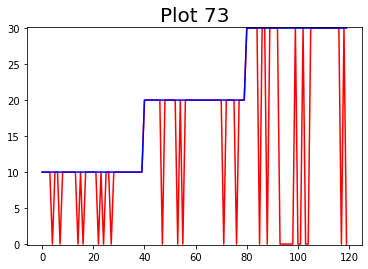

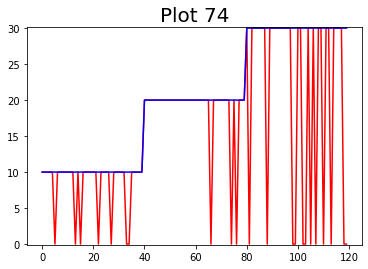

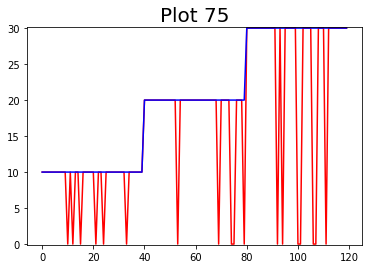

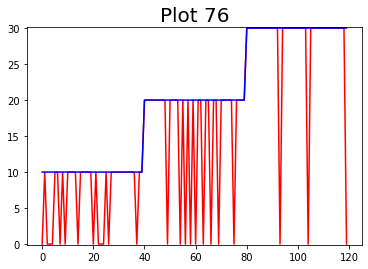

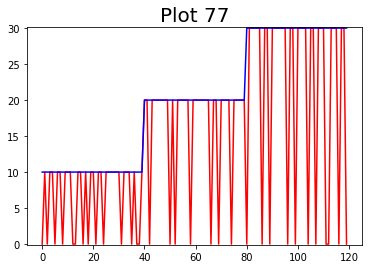

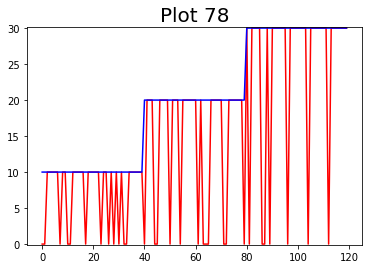

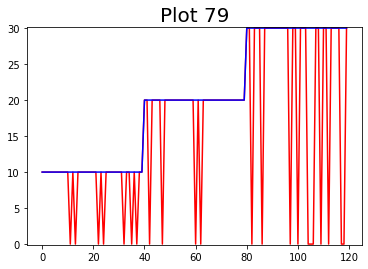

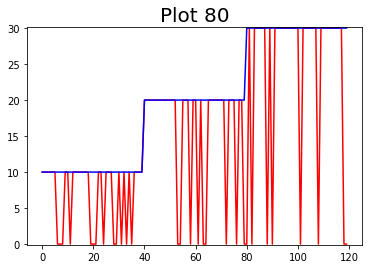

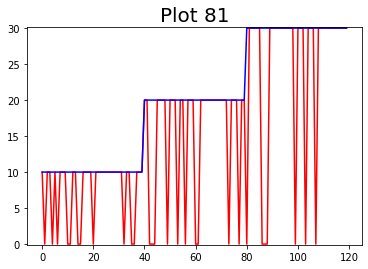

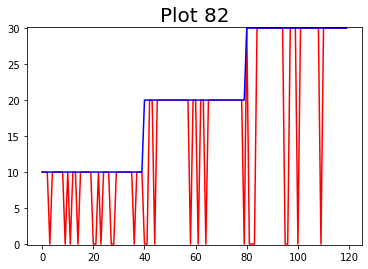

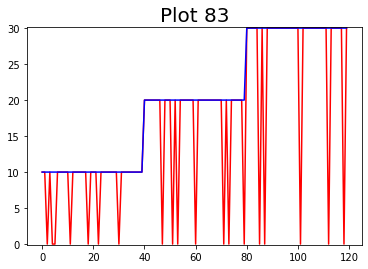

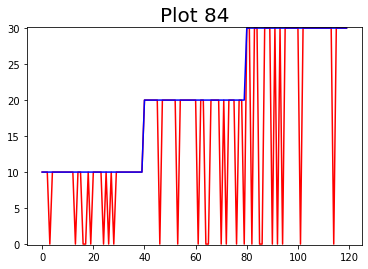

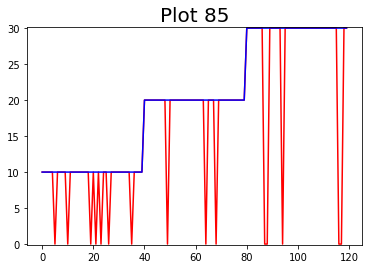

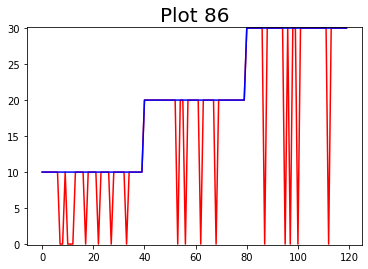

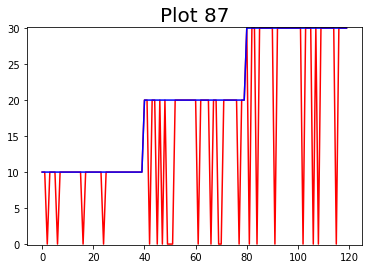

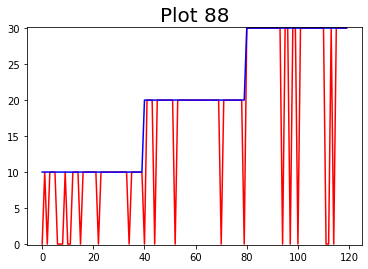

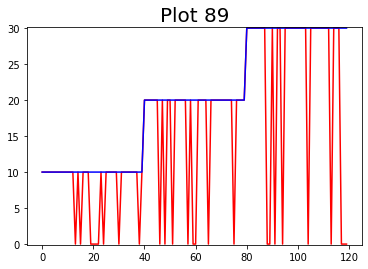

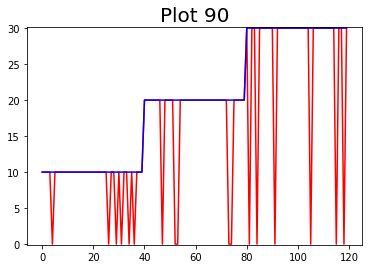

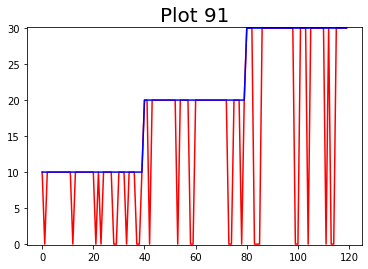

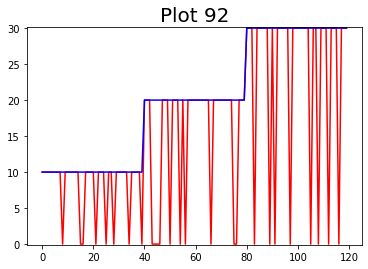

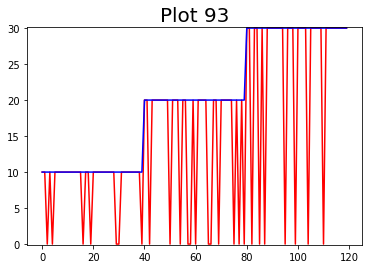

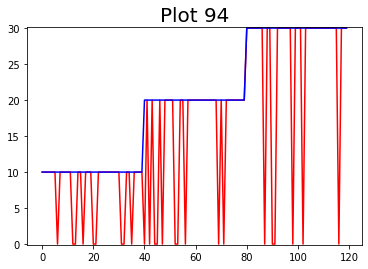

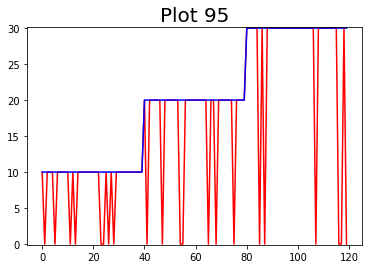

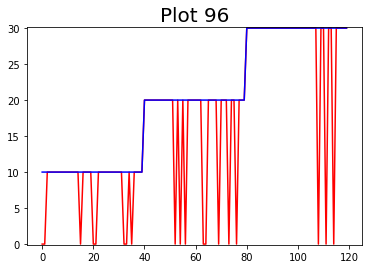

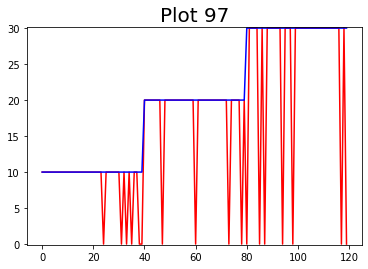

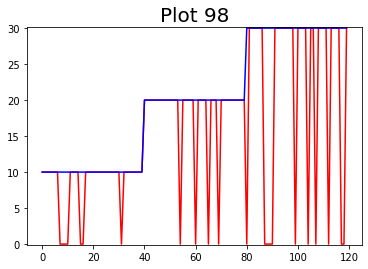

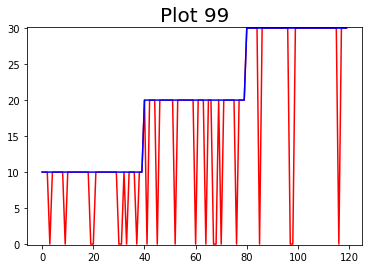

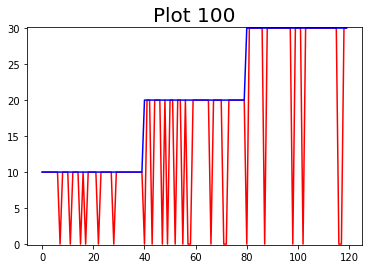

In [3]:
# Visually inspect results:
rpca.plot_fit()
# plt.show()